# Gun Violence EDA

Hello! This is the notebook where everyone will contribute their EDA work. Please update this notebook with your code, and change the names of the gun violence dataframe you used in your analyses to match `gun_data` as loaded in the cell below. 

## Set Up

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy

## Load Data: Gun Violence Dataset

In [5]:
#gun_data = pd.read_csv('stage3.csv')
gun_data = pd.read_csv('gun-violence-data_01-2013_03-2018.csv')
missing_row = ['sban_1', '2017-10-01', 'Nevada', 'Las Vegas', 'Mandalay Bay 3950 Blvd S', 59, 489, 'https://en.wikipedia.org/wiki/2017_Las_Vegas_shooting', 'https://en.wikipedia.org/wiki/2017_Las_Vegas_shooting', '-', '-', '-', '-', '-', '36.095', 'Hotel', 
               '-115.171667', 47, 'Route 91 Harvest Festiva; concert, open fire from 32nd floor. 47 guns seized; TOTAL:59 kill, 489 inj, number shot TBD,girlfriend Marilou Danley POI', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
gun_data.loc[len(gun_data)] = missing_row
# Create some additional features
gun_data['date'] = pd.to_datetime(gun_data['date'])
gun_data['year'] = gun_data['date'].dt.year
gun_data['month'] = gun_data['date'].dt.month
gun_data['monthday'] = gun_data['date'].dt.day
gun_data['weekday'] = gun_data['date'].dt.weekday
gun_data['loss'] = gun_data['n_killed'] + gun_data['n_injured']

# Sort data by state since gun reform data is sorted by state and year in ascending order
gun_data = gun_data.sort_values(['state', 'year'], ascending = [True, True])

# Filter only cases where the year is between 2014 and 2017
gun_data = gun_data[(gun_data['year'] >= 2014) & (gun_data['year'] <= 2017)]

# Remove some unecessary columns
gun_data = gun_data.drop(columns=['city_or_county','address','source_url','participant_relationship',
                                    'incident_url_fields_missing', 'latitude', 'longitude', 'location_description',
                                    'participant_name', 'sources', 'month', 'monthday', 'weekday', 'loss',
                                   'gun_stolen', 'gun_type', 'n_guns_involved', 'notes'])

# Drop rows with NaN values
gun_data = gun_data.dropna()

gun_data.head()

,incident_id,date,state,n_killed,n_injured,incident_url,congressional_district,incident_characteristics,participant_age,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district,year
296,92342,2014-01-01,Alabama,1,0,http://www.gunviolencearchive.org/incident/92342,5.0,"Shot - Dead (murder, accidental, suicide)",0::21||1::24,0::Adult 18+||1::Adult 18+,0::Female||1::Male,0::Killed||1::Unharmed,0::Victim||1::Subject-Suspect,19.0,7.0,2014
315,94194,2014-01-01,Alabama,0,3,http://www.gunviolencearchive.org/incident/94194,4.0,Home Invasion||Home Invasion - Resident injure...,3::17||4::19||5::19||6::19,3::Teen 12-17||4::Adult 18+||5::Adult 18+||6::...,0::Male||1::Male||2::Female||3::Male||4::Male|...,0::Injured||1::Injured||2::Injured||3::Unharme...,0::Victim||1::Victim||2::Victim||3::Subject-Su...,61.0,21.0,2014
320,92337,2014-01-01,Alabama,1,0,http://www.gunviolencearchive.org/incident/92337,2.0,"Shot - Dead (murder, accidental, suicide)",0::18||1::19,0::Adult 18+||1::Adult 18+,0::Female||1::Male,0::Killed||1::Unharmed,0::Victim||1::Subject-Suspect,90.0,25.0,2014
383,95279,2014-01-01,Alabama,0,1,http://www.gunviolencearchive.org/incident/95279,4.0,Shot - Wounded/Injured,0::73,0::Adult 18+,0::Female,0::Injured,0::Victim,28.0,10.0,2014
400,92221,2014-01-01,Alabama,1,0,http://www.gunviolencearchive.org/incident/92221,7.0,"Shot - Dead (murder, accidental, suicide)",0::36,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Killed||1::Unharmed,0::Victim||1::Subject-Suspect,52.0,18.0,2014


## Load Data: Gun Reform Dataset

In [8]:
# Read and store dataset as a dataframe
reform_data = pd.read_csv('gun_reform.csv')

# Sort data by state since gun reform data is sorted by state and year in ascending order
reform_data = reform_data.sort_values(['State', 'Supersession Date Year'], ascending = [True, True])

#rename state
reform_data.rename(columns = {'State':'state'}, inplace = True)

# Filter only cases where the year is between 2014 and 2017
reform_data = reform_data[(reform_data['Supersession Date Year'] >= 2014) & (reform_data['Supersession Date Year'] <= 2017)]

# Remove some unecessary columns
reform_data = reform_data.drop(columns=['Exception Code','Caveats and Ambiguities','Additional Context and Notes',
                                   'Controlling Law at Beginning of Period (1979)', 'State Postal Abbreviation',
                                       'Statutory Citation'])

# Drop rows with NaN values
#reform_data = reform_data.dropna()

reform_data.head()

,Law ID,state,FIPS Code,Law Class (num),Law Class,Law Class Subtype,Handguns or Long Guns,Effect,Type of Change,Effective Date,...,Effective Date Year,Effective Date Month,Effective Date Day,Content,Supersession Date,Supersession Date Year,Supersession Date Month,Supersession Date Day,Age for Minimum Age Laws,"Length of Waiting Period (days, handguns)"
8,AL1009,Alabama,1,7,minimum age,youth possession,handgun,NaN,NaN,NaN,...,NaN,NaN,NaN,No law imposing minimum age for youth possessi...,2015-10-01,2015.0,10.0,1.0,NaN,NaN
13,AL1015,Alabama,1,11,registration,NaN,handgun,Restrictive,Implement,1936-10-01,...,1936.0,10,1.0,§ 13A-11-79 ... A true record in triplicate sh...,2015-09-01,2015.0,9.0,1.0,NaN,NaN
26,AL1028,Alabama,1,10,prohibited possessor,dvro,handgun and long gun,NaN,NaN,NaN,...,NaN,NaN,NaN,No law prohibiting individuals subject to DVRO...,2015-06-04,2015.0,6.0,4.0,NaN,NaN
115,AZ1025,Arizona,4,10,prohibited possessor,mental health : committed to mh facility,handgun and long gun,Restrictive,Implement,1978-10-01,...,1978.0,10,1.0,A.R.S. § 13-3101“Prohibited possessor” means ...,2014-12-31,2014.0,12.0,31.0,NaN,NaN
203,CA1011,California,6,4,child access laws,negligent storage,handgun and long gun,Restrictive,Implement,1992-01-01,...,1992.0,1,1.0,"(1) Except as provided in subdivision (c), a p...",2014-01-01,2014.0,1.0,1.0,NaN,NaN


# Load Data: State Firearm Laws Dataset

In [10]:
# Read and store dataset as a dataframe
firearm_data1 = pd.read_csv('statefirearmlaws.csv')

# Sort data by state since gun reform data is sorted by state and year in ascending order
firearm_data1 = firearm_data1.sort_values(['state', 'year'], ascending = [True, True])

# Filter only cases where the year is between 2014 and 2017
firearm_data1 = firearm_data1[(firearm_data1['year'] >= 2014) & (firearm_data1['year'] <= 2017)]

# Drop rows with NaN values
firearm_data1 = firearm_data1.dropna()

# Create new dataframe that contains only the following 3 columns: state, year, lawtotal
firearm_data = firearm_data1[['state', 'year', 'lawtotal']].copy()

# Print dataframe
firearm_data

,state,year,lawtotal
23,Alabama,2014,10
24,Alabama,2015,10
25,Alabama,2016,10
26,Alabama,2017,10
53,Alaska,2014,3
...,...,...,...
1466,Wisconsin,2017,23
1493,Wyoming,2014,8
1494,Wyoming,2015,8
1495,Wyoming,2016,8


# Merge Datasets

In [11]:
# merging the gun violence data and the state firearm data based on the state and year
# for every incident in the gun violence data, we have the total number of laws (column: lawtotal)
# passed in that state and year
merged_reforms = pd.merge(gun_data, firearm_data, on=['state', 'year'])
merged_reforms

,incident_id,date,state,n_killed,n_injured,incident_url,congressional_district,incident_characteristics,participant_age,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district,year,lawtotal
0,92342,2014-01-01,Alabama,1,0,http://www.gunviolencearchive.org/incident/92342,5.0,"Shot - Dead (murder, accidental, suicide)",0::21||1::24,0::Adult 18+||1::Adult 18+,0::Female||1::Male,0::Killed||1::Unharmed,0::Victim||1::Subject-Suspect,19.0,7.0,2014,10
1,94194,2014-01-01,Alabama,0,3,http://www.gunviolencearchive.org/incident/94194,4.0,Home Invasion||Home Invasion - Resident injure...,3::17||4::19||5::19||6::19,3::Teen 12-17||4::Adult 18+||5::Adult 18+||6::...,0::Male||1::Male||2::Female||3::Male||4::Male|...,0::Injured||1::Injured||2::Injured||3::Unharme...,0::Victim||1::Victim||2::Victim||3::Subject-Su...,61.0,21.0,2014,10
2,92337,2014-01-01,Alabama,1,0,http://www.gunviolencearchive.org/incident/92337,2.0,"Shot - Dead (murder, accidental, suicide)",0::18||1::19,0::Adult 18+||1::Adult 18+,0::Female||1::Male,0::Killed||1::Unharmed,0::Victim||1::Subject-Suspect,90.0,25.0,2014,10
3,95279,2014-01-01,Alabama,0,1,http://www.gunviolencearchive.org/incident/95279,4.0,Shot - Wounded/Injured,0::73,0::Adult 18+,0::Female,0::Injured,0::Victim,28.0,10.0,2014,10
4,92221,2014-01-01,Alabama,1,0,http://www.gunviolencearchive.org/incident/92221,7.0,"Shot - Dead (murder, accidental, suicide)",0::36,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Killed||1::Unharmed,0::Victim||1::Subject-Suspect,52.0,18.0,2014,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114643,974575,2017-10-25,Wyoming,0,0,http://www.gunviolencearchive.org/incident/974575,0.0,Shots Fired - No Injuries||Defensive Use||Defe...,0::48,0::Adult 18+,0::Male,0::Unharmed,0::Victim,24.0,18.0,2017,8
114644,987303,2017-11-10,Wyoming,0,0,http://www.gunviolencearchive.org/incident/987303,0.0,Institution/Group/Business||Non-Shooting Incid...,0::64,0::Adult 18+,0::Male,"0::Unharmed, Arrested",0::Subject-Suspect,36.0,27.0,2017,8
114645,989049,2017-11-14,Wyoming,1,0,http://www.gunviolencearchive.org/incident/989049,0.0,"Shot - Dead (murder, accidental, suicide)",0::35||1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,12.0,8.0,2017,8
114646,1034972,2017-12-14,Wyoming,0,0,http://www.gunviolencearchive.org/incident/103...,0.0,Non-Shooting Incident||ATF/LE Confiscation/Rai...,0::19,0::Adult 18+,0::Male,"0::Unharmed, Arrested",0::Subject-Suspect,23.0,17.0,2017,8


# EDA

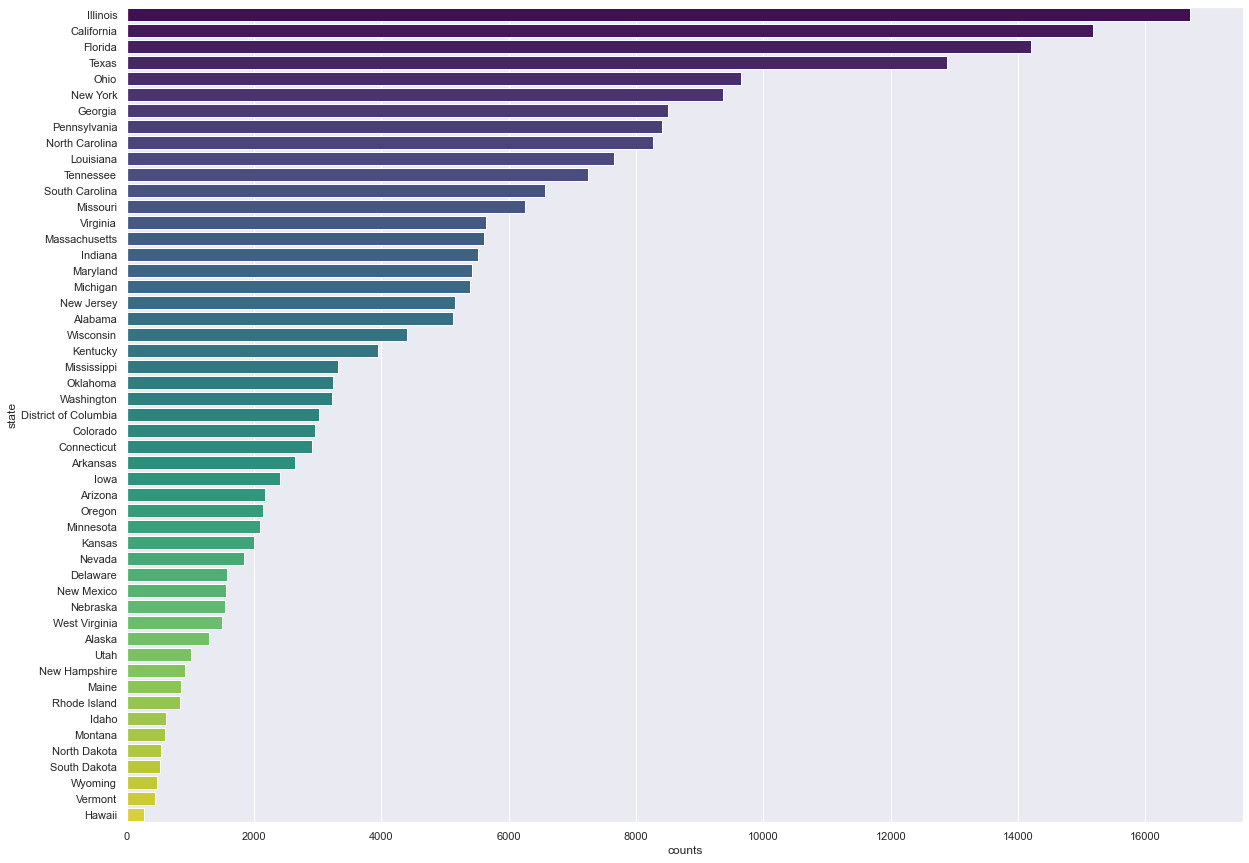

In [3]:
df_state = gun_data[(gun_data['year'] > 2013) & (gun_data['year'] < 2018)]
df_state = df_state.groupby(['state']).size().reset_index(name='counts')
df_state = df_state.sort_values(by='counts', ascending=False)
sns.set(rc = {'figure.figsize':(20,15)})
sns.barplot(x='counts', y='state', data=df_state, palette='viridis');

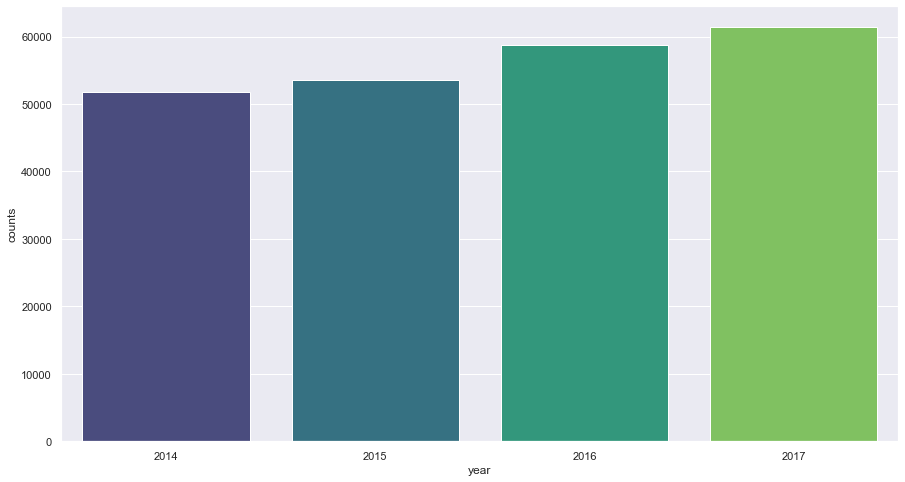

In [4]:
df_year = gun_data.loc[:,['year', 'state']]
df_year = df_year.groupby(['year']).size().reset_index(name='counts')
# print(df_year)
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x='year', y='counts', data=df_year.loc[1:4,:], palette='viridis');

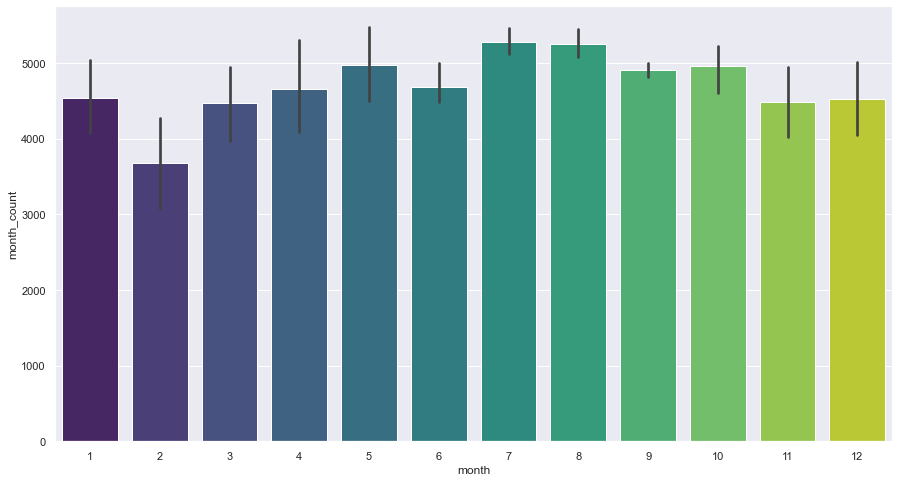

In [5]:
df_month = gun_data[(gun_data['year'] != 2013) & (gun_data['year'] != 2018)]
df_month = df_month.groupby(['year', 'month']).agg({'month': 'count'}).rename(columns={'month': 'month_count'}).reset_index()
# print(df_month)
sns.barplot(x="month", y="month_count", data=df_month, palette='viridis');

Text(0, 0.5, 'counts')

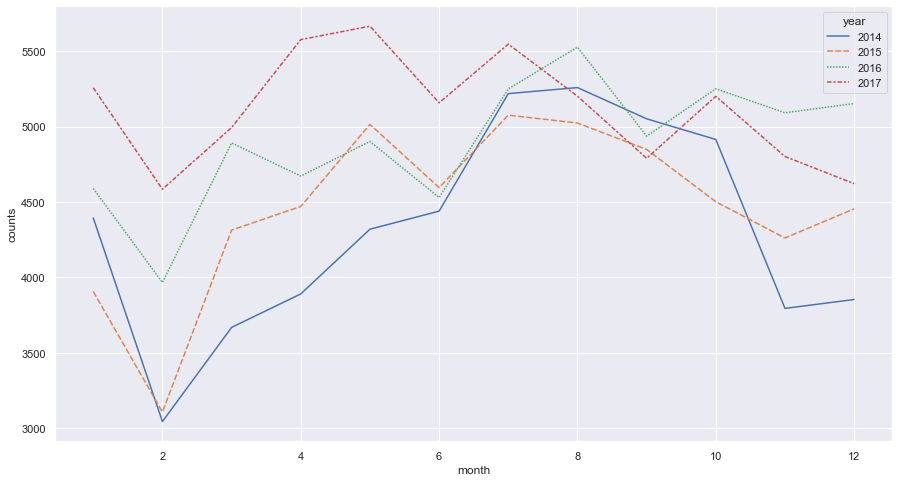

In [61]:
df_month_pattern = gun_data[(gun_data['year'] != 2013) & (gun_data['year'] != 2018)]
df_month_pattern = df_month_pattern.groupby(['year', 'month']).size().reset_index(name='counts')
df_month_pattern = df_month_pattern.pivot(index='month', columns='year', values='counts')
#print(df_month_pattern)
sns.set(rc = {'figure.figsize':(15,8)})
month_lineplot = sns.lineplot(data=df_month_pattern)
month_lineplot.set_ylabel("counts")


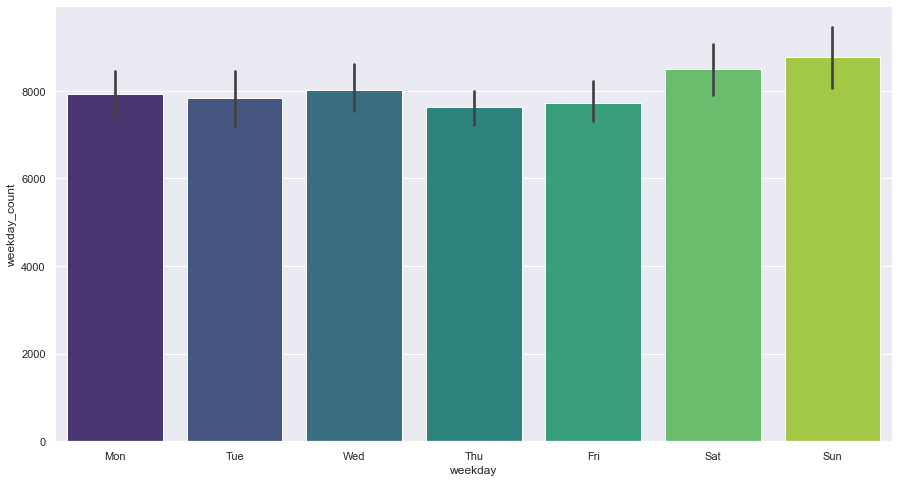

In [6]:
df_week = gun_data[(gun_data['year'] != 2013) & (gun_data['year'] != 2018)]
df_week = df_week.groupby(['year', 'weekday']).agg({'weekday': 'count'}).rename(columns={'weekday': 'weekday_count'}).reset_index()
map = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df_week['weekday'] = df_week['weekday'].map(map)
df_week
sns.barplot(x="weekday", y="weekday_count", data=df_week, palette='viridis');

In [7]:
laws_data = pd.read_csv('statefirearmlaws.csv')
df_laws = laws_data[(laws_data['year'] > 2013) & (laws_data['year'] < 2018)]
df_laws = df_laws.groupby(['state']).sum().reset_index().sort_values(by='lawtotal', ascending=False)
df_laws.head()

,state,year,felony,invcommitment,invoutpatient,danger,drugmisdemeanor,alctreatment,alcoholism,relinquishment,...,expartedating,dvrosurrender,dvrosurrendernoconditions,dvrosurrenderdating,expartesurrender,expartesurrendernoconditions,expartesurrenderdating,dvroremoval,stalking,lawtotal
4,California,8062,4,4,0,4,0,0,4,0,...,4,4,4,4,4,4,4,4,4,412
20,Massachusetts,8062,4,4,4,4,4,4,0,4,...,4,4,4,4,4,4,4,4,4,404
6,Connecticut,8062,4,4,4,4,4,0,0,4,...,2,4,4,4,2,2,2,0,4,342
10,Hawaii,8062,4,4,4,4,4,4,0,4,...,4,4,4,4,4,4,4,0,2,314
31,New York,8062,4,4,4,4,4,0,0,4,...,4,4,4,4,4,4,4,0,4,296


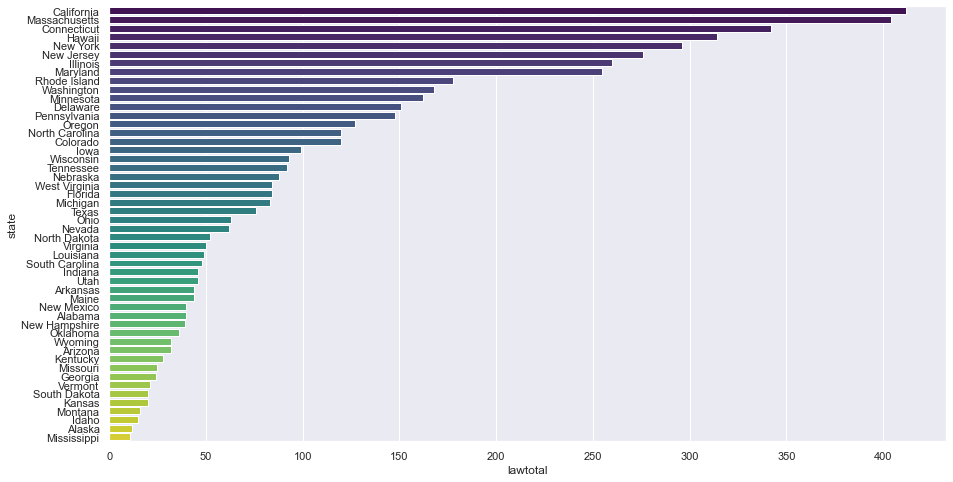

In [8]:
sns.barplot(x='lawtotal', y='state', data=df_laws, palette='viridis');

In [9]:
df_state_laws = pd.merge(df_state, df_laws, how='inner', on='state')
df_state_laws = df_state_laws.drop(['year'], axis=1)
df_state_laws.head()

,state,counts,felony,invcommitment,invoutpatient,danger,drugmisdemeanor,alctreatment,alcoholism,relinquishment,...,expartedating,dvrosurrender,dvrosurrendernoconditions,dvrosurrenderdating,expartesurrender,expartesurrendernoconditions,expartesurrenderdating,dvroremoval,stalking,lawtotal
0,Illinois,16695,4,4,4,4,4,0,0,4,...,4,4,4,4,4,4,4,0,4,260
1,California,15171,4,4,0,4,0,0,4,0,...,4,4,4,4,4,4,4,4,4,412
2,Florida,14197,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,84
3,Texas,12890,4,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,76
4,Ohio,9643,0,4,0,4,0,0,4,0,...,0,0,0,0,0,0,0,0,0,63


In [10]:
states_population = pd.read_csv('us_states_census.csv')
df_pop = states_population.loc[:,['state', '2014', '2015', '2016', '2017']]
df_pop['population'] = df_pop[['2014', '2015', '2016', '2017']].mean(axis=1)
df_pop = df_pop.drop(['2014', '2015', '2016', '2017'], axis=1)
df_pop.at[8,'state']='Columbia'
df_states = pd.merge(df_state_laws, df_pop, how='inner', on='state')
df_states
df_states['per_counts'] = 10000 * df_states['counts']/df_states['population']
# df_states.to_csv('df_states.csv', sep=',')
# df_states.head()
stat, p = scipy.stats.pearsonr(df_states['per_counts'], df_states['lawtotal'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('There is not enough evidence to reject H0. Probably independent')
else:
	print('There is enough evidence to reject H0. Probably dependent')
# law_tatoal vs. gun_violence_counts per 10000 people

stat=-0.183, p=0.204
There is not enough evidence to reject H0. Probably independent


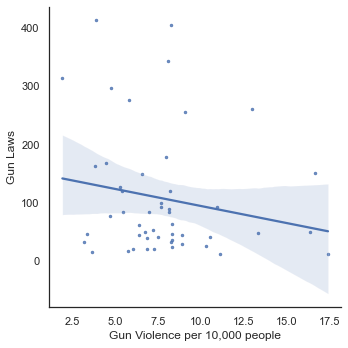

In [11]:
sns.set_style('white')
ax = sns.lmplot(x="per_counts", y="lawtotal", data=df_states, scatter_kws={'s': 6}, legend=True)
ax.set(ylabel="Gun Laws")
ax.set(xlabel="Gun Violence per 10,000 people");

# Hypothesis Testing

The hypothesis that we will be testing is that states with more strict gun laws have a smaller amount of gun violence indicidents compared to states with less strict gun laws.


In [12]:
#gunlaws = pd.read_csv("gun_laws.csv")
gun_laws = pd.DataFrame(data = laws_data,columns=['state', 'year', 'lawtotal'])
# gun_laws = pd.DataFrame(data = gunlaws,columns=['state', 'year', 'lawtotal'])

gun_laws.head()


,state,year,lawtotal
0,Alabama,1991,15
1,Alabama,1992,16
2,Alabama,1993,16
3,Alabama,1994,16
4,Alabama,1995,16


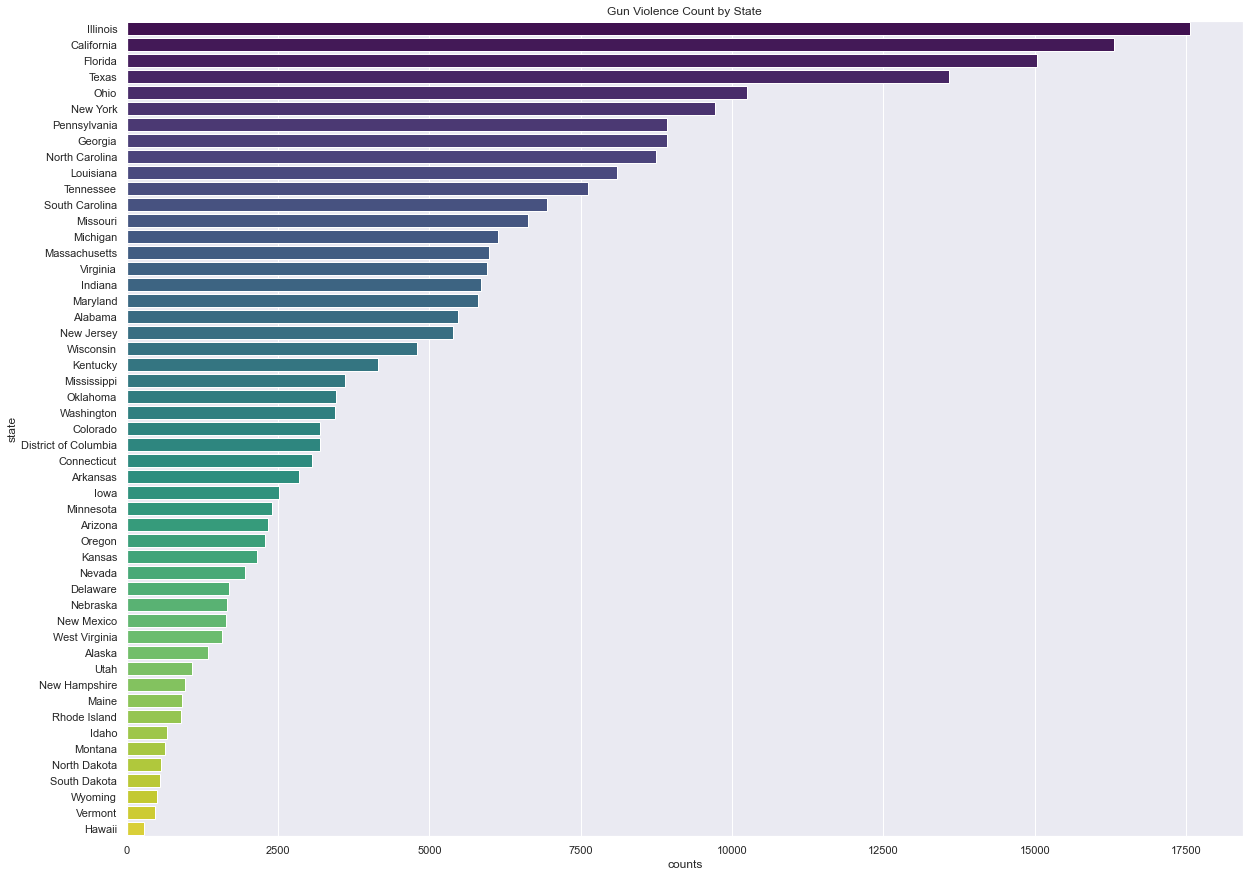

In [13]:
df_state = gun_data.groupby(['state']).size().reset_index(name='counts')
df_state = df_state.sort_values(by='counts', ascending=False)
sns.set(rc = {'figure.figsize':(20,15)})
sns.barplot(x='counts', y='state', data=df_state, palette='viridis').set(title="Gun Violence Count by State");

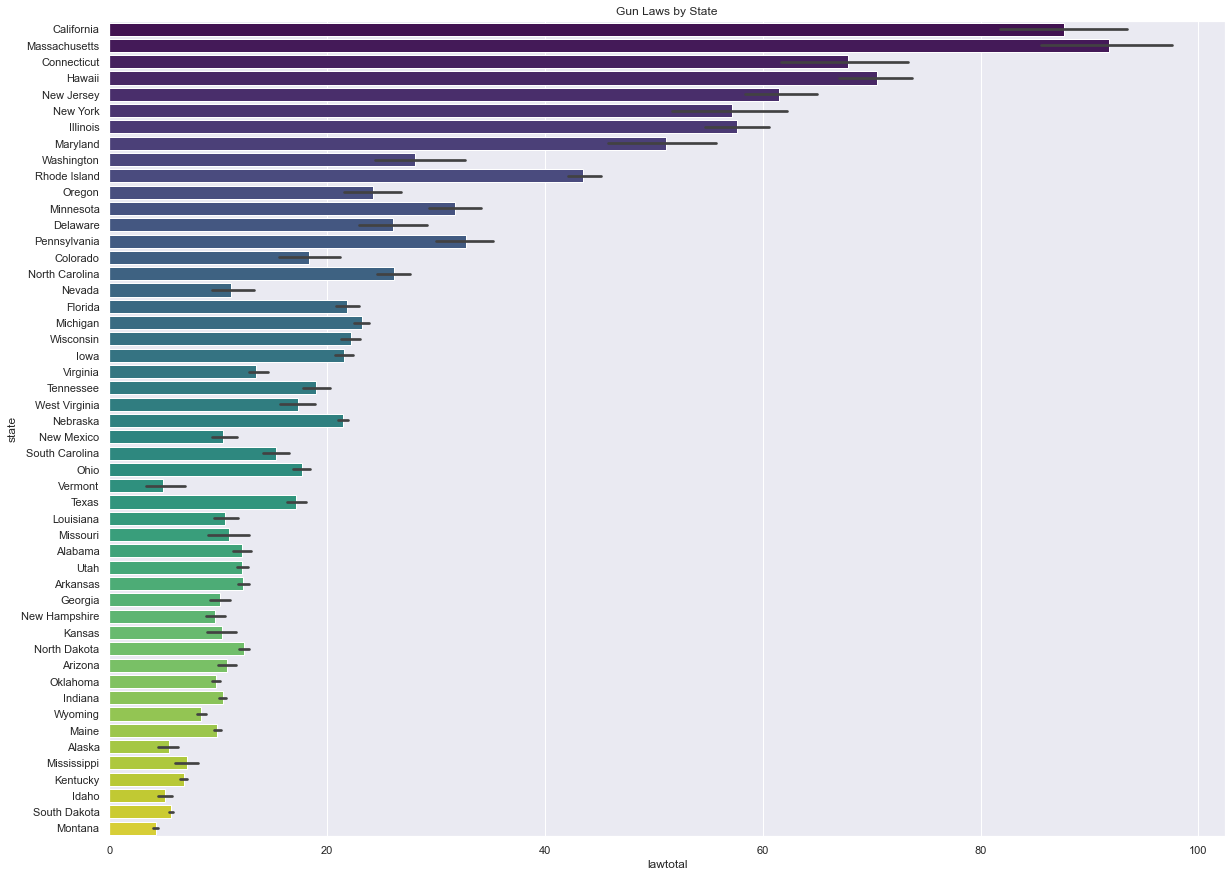

In [14]:
df_laws = gun_laws.sort_values(by='lawtotal', ascending=False)
sns.set(rc = {'figure.figsize':(20,15)})
sns.barplot(x='lawtotal', y='state', data=df_laws, palette='viridis').set(title="Gun Laws by State");

Looking at the visualizations, Illinois has the highest gun violence incidents and Hawaii has the least number of incidents. However, the population difference is very large. Michigan's population is closer to Illinois' population, so we will compare those two states.


In [15]:
top_state_inc = pd.DataFrame(df_state[df_state['state'] == 'Illinois'])
low_state_inc = pd.DataFrame(df_state[df_state['state'] =='Michigan'])

list_states_inc = [top_state_inc, low_state_inc]
stats_inc = pd.concat(list_states_inc)

stats_inc

,state,counts
13,Illinois,17556
22,Michigan,6136


In [16]:
top_state_law = pd.DataFrame(gun_laws[gun_laws['state'] == 'Illinois'])
top_state_law = top_state_law[top_state_law['year'] == 2018]
low_state_law = pd.DataFrame(gun_laws[gun_laws['state'] =='Michigan'])
low_state_law = low_state_law[low_state_law['year'] == 2018]

list_states_laws = [top_state_law, low_state_law]
stats_laws = pd.concat(list_states_laws)

stats_laws


,state,year,lawtotal
387,Illinois,2018,65
657,Michigan,2018,21


# Hypothesis Results

[Text(0.5, 1.0, 'Number of Incidents in Illinois v Michigan')]

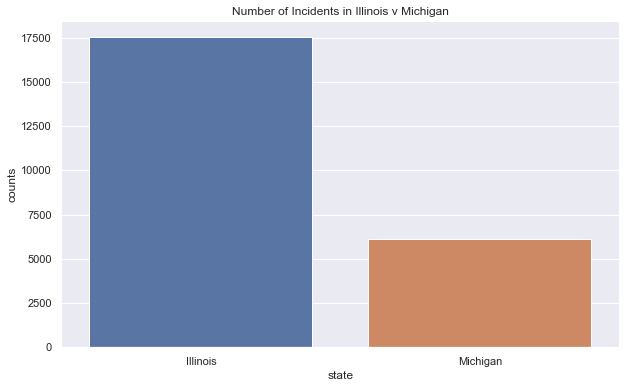

In [17]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.barplot(data=stats_inc, x="state", y="counts").set(title="Number of Incidents in Illinois v Michigan")

[Text(0.5, 1.0, 'Number of Gun Laws in Illinois v Michigan')]

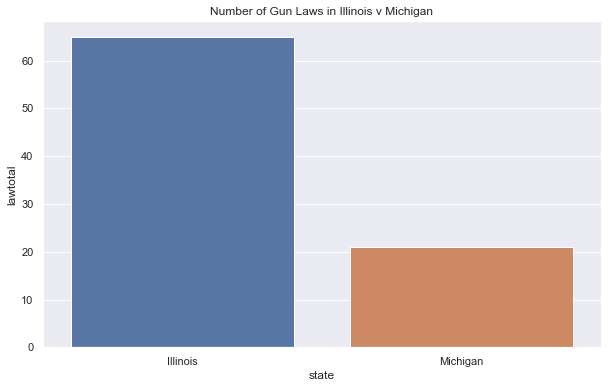

In [18]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.barplot(data=stats_laws, x="state", y="lawtotal").set(title="Number of Gun Laws in Illinois v Michigan")

Our hypothesis is incorrect. Illinois has the highest number of gun-related incidents, but a higher number of gun laws. Michigan has a lower number of gun-related incidents, and a lower number of gun laws. Given that our hypothesis was that states with low gun-reated incidents have higher gun laws, and vice versa, our hypothesis was incorrect. 